In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
df=pd.read_csv("Car_Price_Prediction.csv")
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i]) 
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,2,1,30246.207931
1,2,2,2014,1.7,94799,1,0,22785.747684
2,1,1,2006,4.1,98385,1,1,25760.290347
3,3,1,2015,2.6,88919,1,0,25638.003491
4,3,2,2004,3.4,138482,2,0,21021.386657
...,...,...,...,...,...,...,...,...
995,4,3,2002,1.9,5445,2,1,22765.597091
996,3,1,2020,3.1,149112,0,1,30392.575567
997,2,2,2008,1.9,195387,2,0,16446.892292
998,4,0,2003,4.4,246,2,0,27396.156708


In [4]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred=model.predict(x_test)
y_pred

array([25912.74234137, 29884.42135838, 27795.96127205, 26617.33158867,
       28620.20145754, 19689.65053802, 22633.47641561, 27513.13728404,
       31034.82285856, 23392.25960171, 29490.73031658, 21734.49054485,
       19225.81904369, 26116.28479505, 26185.77167054, 28708.89152891,
       20827.75706568, 27603.82809354, 24668.93547347, 31894.5273233 ,
       23215.81906217, 20935.52977887, 17338.67059493, 22678.49730367,
       18639.65239203, 23837.45980741, 27976.7594278 , 21325.52621759,
       24193.30299809, 29109.00148867, 18750.02731691, 24495.16707543,
       22668.0463205 , 34126.95671668, 29560.12772861, 30487.33254564,
       17801.32112927, 29587.34430581, 30549.44007528, 26320.18840406,
       30713.2780735 , 25683.91695217, 29822.68539991, 25071.86002368,
       21537.75947268, 21922.37003696, 32582.05527241, 33120.26871339,
       25422.25778682, 22566.00895974, 32467.20275758, 21197.58207266,
       23214.70155599, 20191.13846213, 22416.69383637, 28457.26536724,
      

In [8]:
print("R2 Score:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print("RMSE:",RMSE)

R2 Score: 0.8022572861689343
MSE: 5411562.587369692
RMSE: 2326.276550062286


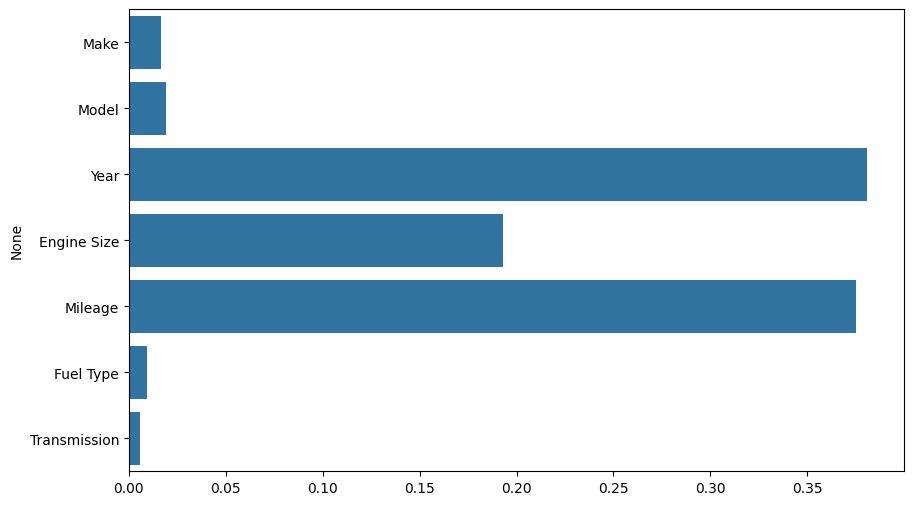

In [ ]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [10]:
new_data=pd.DataFrame({
    "Make":label.fit_transform(["Honda"]),
    "Model":label.fit_transform(["Model A"]),
    "Year":2015,
    "Engine Size":3.9,
    "Mileage":74176,
    "Fuel Type":label.fit_transform(["Petrol"]),
    "Transmission":label.fit_transform(["Manual"])

})
prdict=model.predict(new_data)
prdict

array([30519.57704944])